# Regression Predict Team NM2 Solution

© Explore Data Science Academy

---
### Honour Code

We {**UBASINACHI ELEONU, ELIZABETH AJABOR, YINKA AKINDELE, AKINBOWALE AKIN-TAYLOR, EMMANUEL MAISAJE, TOCHUKWU EZEOKAFOR**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

We understand that non-compliance with the honour code constitutes a material breach of contract.


## Contributors

* UBASINACHI ELEONU
* ELIZABETH AJABOR
* YINKA AKINDELE
* AKINBOWALE AKIN-TAYLOR
* EMMANUEL MAISAJE
* TOCHUKWU EZEOKAFOR

<a id="cont"></a>

## Table of Contents

<a href=#i>i. Problem Statement</a>

<a href=#ii>ii. Objectives</a>

<a href=#iii>iii. Features Description</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="i"></a>
## i. Problem Statement

To prevent the drastic effect of climate change and ensure sustainability of the global ecosystem, the world is gradually adopting the use of renewable energy. Asides ensuring a steady supply of electricity for a productive livelihood, renewable energy sources has also led to the emergence of new energy markets, enterprises, and job opportunities.

Renewable energy sources accounted for 43% of all electricity generated in Spain in the year 2020. As a result, the government of Spain is considering an expansion of its renewable energy resource infrastructure investments. To do so, they need information on the country's renewable resource and fossil fuel energy generating trends and patterns.

Our team of data scientists have been tasked with creating a model that would help predict the three-hourly load shortfall between the energy generated by means of fossil fuels and various renewable sources in Spain. This information will aid the government in determining how much infrastructure spending should be increased.


![Loadshedding](https://github.com/JayHansea/TEAM-NM2/blob/65985167bb4b2ce180e3217d9b1b5356c9047a4d/Electricity%20Shortfall%20Image.jpg?raw=true)

[Image Source](https://dailytimes.com.pk/927865/pakistanis-suffer-worst-loadshedding-as-electricity-shortfall-reaches-9000mw/)


 <a id="ii"></a>
### ii. Objectives

* Explore and visualize the dataset.
* Clean and engineer the dataset.
* Build several models that predicts the 3 hourly load shortfall.
* Assess the accuracy of the models.
* Choose the best model to make predictions.


 <a id="iii"></a>
### iii. Features Description
* **Time**: The date and time of the day when each feature value was recorded
* **Wind_speed**: This is a measure of the wind speed recorded in each city
* **Wind_deg**: This is a measure of the direction of the wind in each city
* **Pressure**: It is the atmospheric pressure measured in each city
* **Rain_1h/Rain_3h**: This is the amount of rain in each city as recorded in hourly or 3 hourly intervals
* **Snow**: The amount of snowfall in each city
* **Cloud_all**: This is a measure of the percentage of cloud coverage in each city


 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>



---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| First we import, and briefly describe the libraries that will be used throughout our analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np   
import pandas as pd   

# Libraries for data preparation and model building
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import *
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


from tqdm import tqdm
import math
import random

#Visualization Packages
from scipy import stats
from scipy.stats import norm, skew 
import seaborn as sns 
from matplotlib import pyplot as plt


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing & Previewing Data ⚡ |
| :--------------------------- |
|Here we imported the given datasets (train and test dataset) as sourced from [Kaggle](https://www.kaggle.com/competitions/spain-electricity-shortfall-challenge-2022/data). It is important to note that this dataset was first pushed to our Github repository from where it was then loaded to this notebook.

---

In [2]:
# load the train data
df_train = pd.read_csv('Data/df_train.csv')
df_train.head()


,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [3]:
# Load the test data
df_test = pd.read_csv('Data/df_test.csv')
df_test.tail()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000
2919,11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,...,283.816667,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we performed an in-depth analysis of all the variables in the DataFrame. |

---


### Checking the "shape" of the datasets

First, we checked the shape of both datasets, and observed that the training dataset has 49 columns while the test dataset has only 48 coulmns. The missing column from the test set is the target variable the (load_shortfall_3hr) that our model is to predict.

In [4]:
df_train.shape, df_test.shape

((8763, 49), (2920, 48))

### Features Preview

The column function was used to return the names of all the features that are present in both datasets.

In [5]:
df_train.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [6]:
df_test.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [8]:
df_train = df_train.drop(['Unnamed: 0'], axis = 1) 
df_test = df_test.drop(['Unnamed: 0'], axis = 1)

In [11]:
df_train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [12]:
df_test.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


### Summary Statistics

The describe() function was used to generate descriptive statistics that summarizes the central tendency, dispersion 
and shape of the dataset, excluding null values.

In [13]:
df_train.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [14]:
df_test.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,...,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,2.457820,0.067517,3.012785,67.123516,62.644463,43.355422,2.283562,15.477283,162.643836,2.518094,...,290.695462,288.888393,289.911289,284.920684,286.522375,289.124971,288.483641,290.152431,287.869763,286.618130
std,1.774838,0.153381,1.996340,20.611292,24.138393,30.486298,1.654787,25.289197,97.749873,1.625507,...,7.113599,9.089699,7.119411,6.803424,6.492355,7.168049,6.221324,7.906915,8.977511,8.733163
min,0.000000,0.000000,0.000000,11.666667,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,273.816667,269.816667,272.650000,266.483333,268.120000,271.483333,270.138667,271.150000,268.713333,267.816667
25%,1.333333,0.000000,1.666667,52.000000,43.000000,13.333333,1.000000,0.000000,86.666667,1.333333,...,284.816667,281.483333,284.307500,280.150000,281.778333,283.483333,284.150000,284.483333,280.816667,279.816667
50%,2.000000,0.000000,2.333333,70.333333,63.000000,45.000000,1.666667,0.000000,140.000000,2.000000,...,290.150000,287.483333,289.483333,284.483333,286.265000,288.816667,288.483333,289.150000,286.396667,285.483333
75%,3.333333,0.000000,4.000000,85.000000,84.000000,75.000000,3.333333,20.000000,233.333333,3.666667,...,296.483333,295.483333,295.816667,289.816667,291.119167,295.150000,292.816667,295.150000,294.452500,293.150000
max,13.333333,1.600000,14.333333,100.000000,100.000000,97.333333,10.666667,93.333333,360.000000,12.666667,...,309.483333,313.483333,308.150000,307.483333,308.966667,306.816667,310.816667,314.483333,312.223333,310.150000


### Splitting the dataset by cities

In the following cells, we took a deeper dive into the train dataset by splitting it into the different cities. This was done to allow us assess the impact of city specific features in relation to the output variable.

In [15]:
# Madrid
df_hist = df_train
df_Madrid = df_hist.filter(['time', 'Madrid_wind_speed','Madrid_humidity', 'Madrid_clouds_all',
'Madrid_rain_1h','Madrid_weather_id','Madrid_pressure', 'Madrid_temp_max',
'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h'])

In [16]:
# Bilbao
df_hist = df_train
df_Bilbao = df_hist.filter(['time', 'Bilbao_wind_speed','Bilbao_humidity', 'Bilbao_clouds_all',
'Bilbao_rain_1h','Bilbao_weather_id','Bilbao_pressure', 'Bilbao_temp_max',
'Bilbao_temp', 'Bilbao_temp_min', 'load_shortfall_3h'])

In [17]:
# Barcelona
df_hist = df_train
df_Barcelona = df_hist.filter(['time', 'Barcelona_wind_speed','Barcelona_humidity', 'Barcelona_clouds_all',
'Barcelona_rain_1h','Barcelona_weather_id','Barcelona_pressure', 'Barcelona_temp_max',
'Barcelona_temp', 'Barcelona_temp_min', 'load_shortfall_3h'])

In [18]:
# Seville
df_hist = df_train
df_Seville = df_hist.filter(['time', 'Seville_wind_speed','Seville_humidity', 'Seville_clouds_all',
'Seville_rain_1h','Seville_weather_id','Seville_pressure', 'Seville_temp_max',
'Seville_temp', 'Seville_temp_min', 'load_shortfall_3h'])

In [19]:
# Valencia
df_hist = df_train
df_Valencia = df_hist.filter(['time', 'Valencia_wind_speed','Valencia_humidity', 'Valencia_clouds_all',
'Valencia_rain_1h','Valencia_weather_id','Valencia_pressure', 'Valencia_temp_max',
'Valencia_temp', 'Valencia_temp_min', 'load_shortfall_3h'])

### Overview of features distribution by city

We generated independent histograms to evaluate the features of each city in the data set.

array([[<AxesSubplot:title={'center':'Madrid_wind_speed'}>,
        <AxesSubplot:title={'center':'Madrid_humidity'}>,
        <AxesSubplot:title={'center':'Madrid_clouds_all'}>],
       [<AxesSubplot:title={'center':'Madrid_rain_1h'}>,
        <AxesSubplot:title={'center':'Madrid_weather_id'}>,
        <AxesSubplot:title={'center':'Madrid_pressure'}>],
       [<AxesSubplot:title={'center':'Madrid_temp_max'}>,
        <AxesSubplot:title={'center':'Madrid_temp'}>,
        <AxesSubplot:title={'center':'Madrid_temp_min'}>],
       [<AxesSubplot:title={'center':'load_shortfall_3h'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

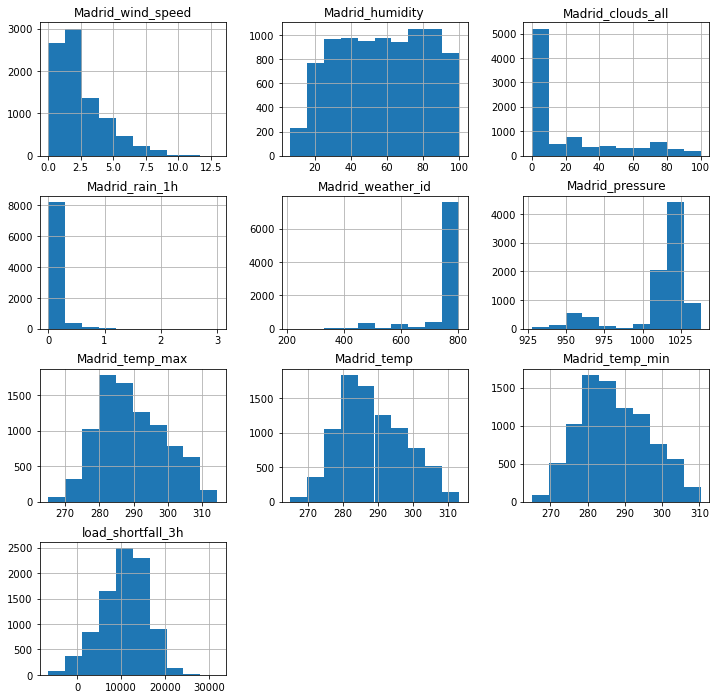

In [20]:
# Madrid
df_Madrid.hist(layout = (4,3), figsize=(12, 12))

array([[<AxesSubplot:title={'center':'Bilbao_wind_speed'}>,
        <AxesSubplot:title={'center':'Bilbao_clouds_all'}>,
        <AxesSubplot:title={'center':'Bilbao_rain_1h'}>],
       [<AxesSubplot:title={'center':'Bilbao_weather_id'}>,
        <AxesSubplot:title={'center':'Bilbao_pressure'}>,
        <AxesSubplot:title={'center':'Bilbao_temp_max'}>],
       [<AxesSubplot:title={'center':'Bilbao_temp'}>,
        <AxesSubplot:title={'center':'Bilbao_temp_min'}>,
        <AxesSubplot:title={'center':'load_shortfall_3h'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

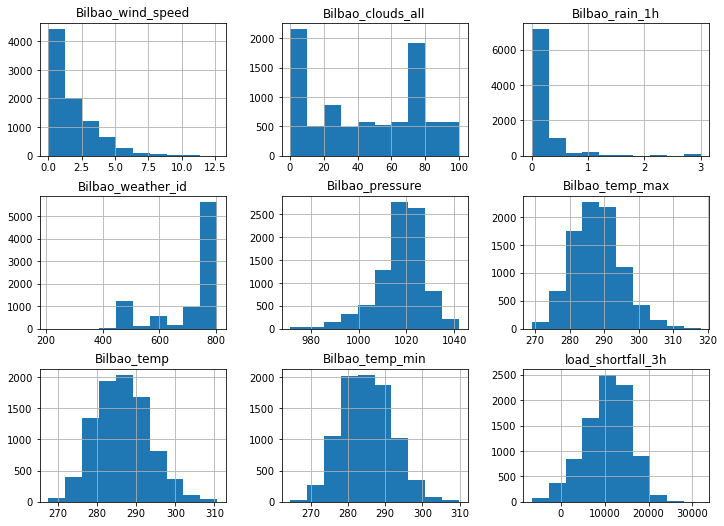

In [22]:
# Bilbao
df_Bilbao.hist(layout = (4,3), figsize=(12, 12))

array([[<AxesSubplot:title={'center':'Barcelona_wind_speed'}>,
        <AxesSubplot:title={'center':'Barcelona_rain_1h'}>,
        <AxesSubplot:title={'center':'Barcelona_weather_id'}>],
       [<AxesSubplot:title={'center':'Barcelona_pressure'}>,
        <AxesSubplot:title={'center':'Barcelona_temp_max'}>,
        <AxesSubplot:title={'center':'Barcelona_temp'}>],
       [<AxesSubplot:title={'center':'Barcelona_temp_min'}>,
        <AxesSubplot:title={'center':'load_shortfall_3h'}>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

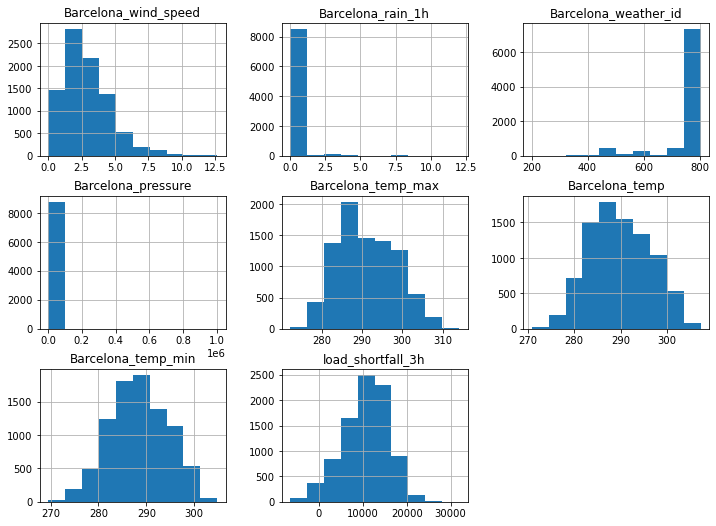

In [23]:
# Barcelona
df_Barcelona.hist(layout = (4,3), figsize=(12, 12))

array([[<AxesSubplot:title={'center':'Seville_wind_speed'}>,
        <AxesSubplot:title={'center':'Seville_humidity'}>,
        <AxesSubplot:title={'center':'Seville_clouds_all'}>],
       [<AxesSubplot:title={'center':'Seville_rain_1h'}>,
        <AxesSubplot:title={'center':'Seville_weather_id'}>,
        <AxesSubplot:title={'center':'Seville_temp_max'}>],
       [<AxesSubplot:title={'center':'Seville_temp'}>,
        <AxesSubplot:title={'center':'Seville_temp_min'}>,
        <AxesSubplot:title={'center':'load_shortfall_3h'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

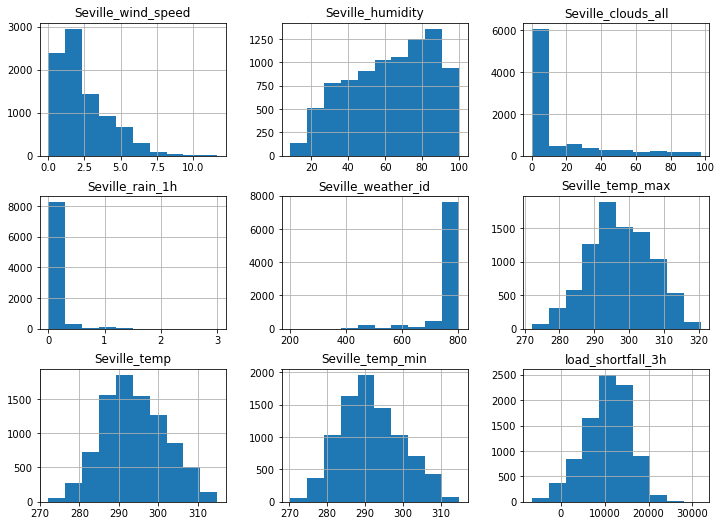

In [24]:
# Seville
df_Seville.hist(layout = (4,3), figsize=(12, 12))

array([[<AxesSubplot:title={'center':'Valencia_wind_speed'}>,
        <AxesSubplot:title={'center':'Valencia_humidity'}>,
        <AxesSubplot:title={'center':'Valencia_pressure'}>],
       [<AxesSubplot:title={'center':'Valencia_temp_max'}>,
        <AxesSubplot:title={'center':'Valencia_temp'}>,
        <AxesSubplot:title={'center':'Valencia_temp_min'}>],
       [<AxesSubplot:title={'center':'load_shortfall_3h'}>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

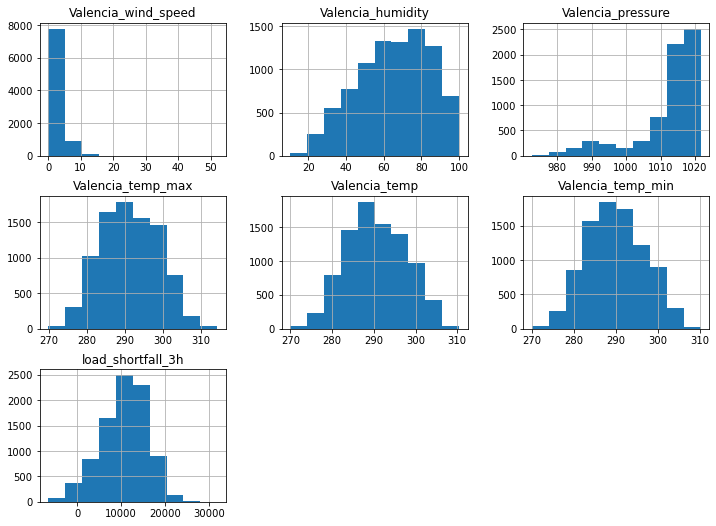

In [25]:
# Valencia
df_Valencia.hist(layout = (4,3), figsize=(12, 12))

### Evaluating correlation with the output variable

It was neccesary to evaluate the correlation of the different features in the train dataset with the target variable to ascertain which features have a very insignificant relationship with the target variable.

In [27]:
df_train.corrwith(df_train["load_shortfall_3h"]).sort_values(ascending=False)

load_shortfall_3h       1.000000
Valencia_temp_min       0.201863
Barcelona_temp_min      0.195984
Madrid_temp             0.186036
Barcelona_temp          0.182673
Madrid_temp_max         0.182548
Bilbao_temp_max         0.180934
Bilbao_temp             0.176411
Madrid_temp_min         0.174744
Seville_temp_min        0.174718
Valencia_temp           0.173225
Bilbao_temp_min         0.172920
Barcelona_temp_max      0.164734
Seville_temp            0.159343
Bilbao_weather_id       0.145875
Valencia_temp_max       0.144270
Seville_temp_max        0.109834
Madrid_pressure         0.092638
Valencia_pressure       0.086022
Barcelona_weather_id    0.063868
Seville_weather_id      0.061104
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Madrid_weather_id       0.030868
Valencia_snow_3h       -0.021633
Barcelona_rain_3h      -0.024720
Madrid_rain_1h         -0.027159
Seville_rain_1h        -0.031572
Bilbao_snow_3h         -0.031721
Seville_rain_3h        -0.032945
Barcelona_

### Checking for multicollinearity

It was also neccesary to evaluate the different features to see how correlated they are with each other. Where multiple columns show strong correlation, only one of such features are retained and used for for the model creation, as these other features may not add any additional functionality or advantage to the model but will only serve to increase it's size and lead to slow performance. a correlation value of 1 represents a perfect positive correlation while a value equal to -1 indicates a perfect negative correlation. The further away the value is from 1 or -1, the weaker the correlation

In [28]:
df_train.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,0.177393,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800
Barcelona_wind_speed,0.294640,0.069997,0.347966,-0.138625,-0.058518,0.094019,0.275317,0.136591,0.177393,1.000000,...,0.084209,0.116240,0.123403,0.120361,0.109268,0.109692,0.130367,0.089365,0.084679,-0.103633


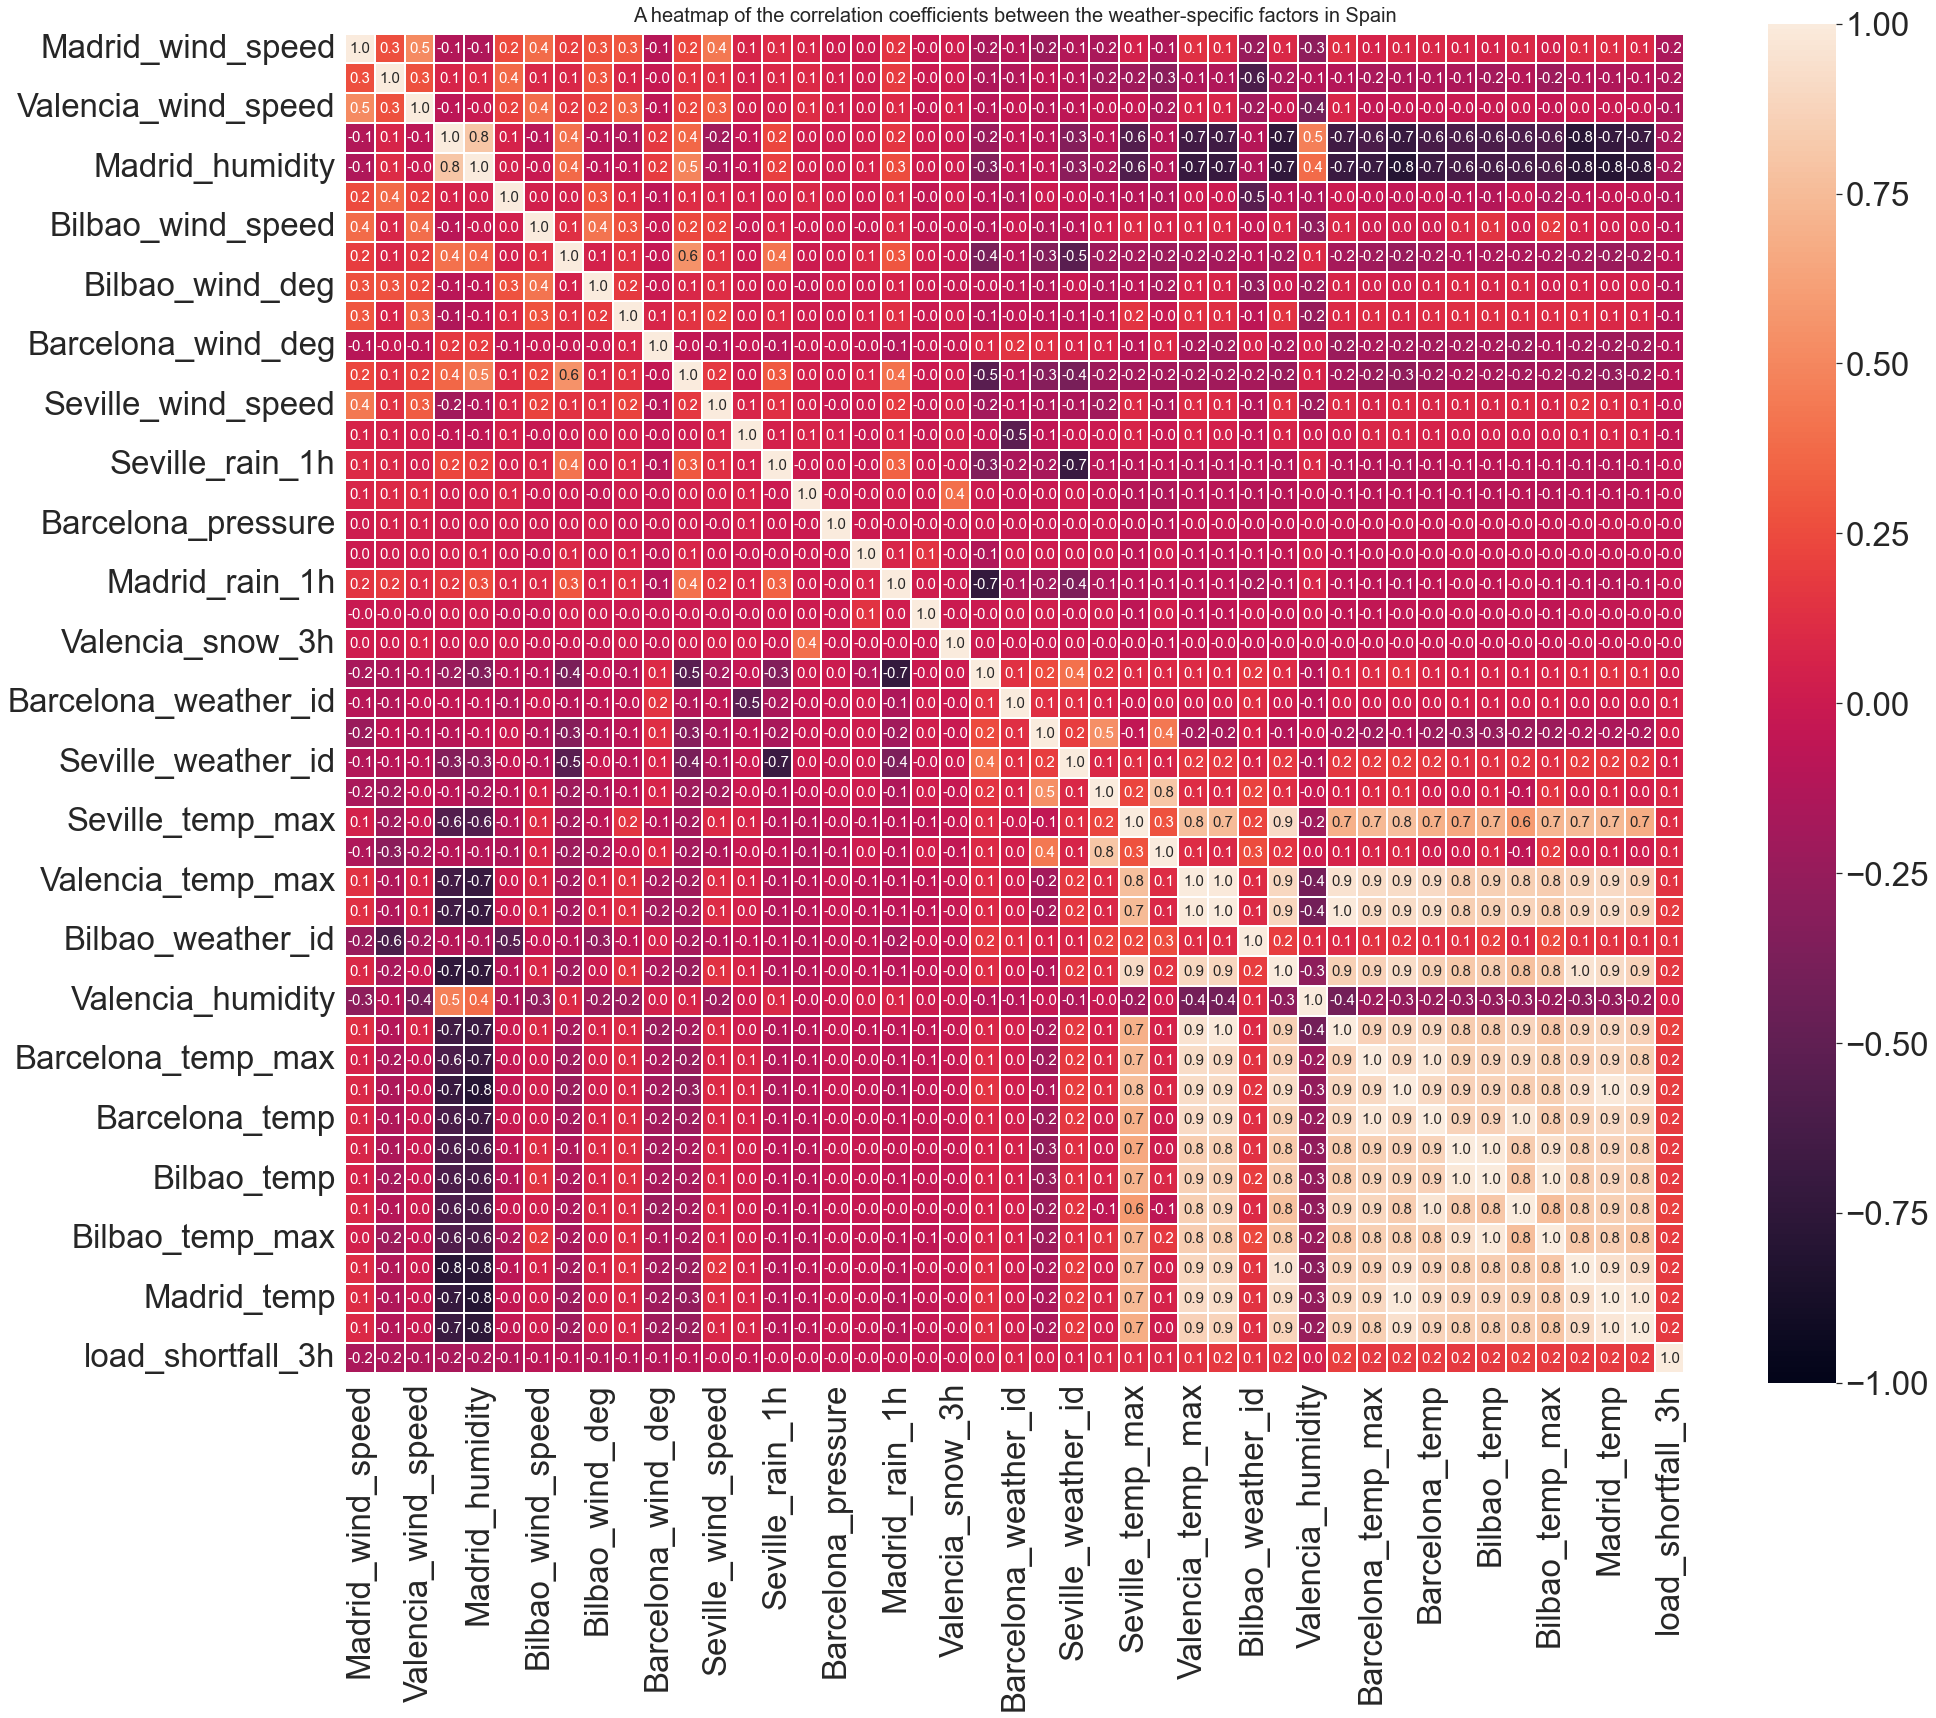

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc



plt.subplots(figsize=(30,25))



heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, annot_kws={'size': 15}, fmt='.1f', square=True, linecolor="w", linewidths=2)
sns.set(font_scale=3.0)



heatmap.set_title('A heatmap of the correlation coefficients between the weather-specific factors in Spain', fontdict={'fontsize': 20}, pad=12);

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we cleaned the dataset, and created new features - as identified in the EDA phase. |

---

### Fixing null values
Identifying the column(s) with null entries is important so it doesnt affect the performance of our model. Using the isnull() function shows us the number of null values present in the dataset. The function shows that only the Valencia_pressure and load_shortfall features have null values. It is important to note that the load_shortfall_3h feature has null entries because it is the variable that is to be predicted by the model.

In [44]:
df_train.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

In [48]:
df_test.isnull().sum()

time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp              0
Valencia_humidity   

C:\Users\Ubasinachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Valencia_pressure'>

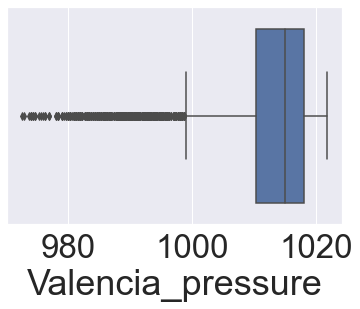

In [51]:
sns.boxplot(df_train['Valencia_pressure'])

C:\Users\Ubasinachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Valencia_pressure'>

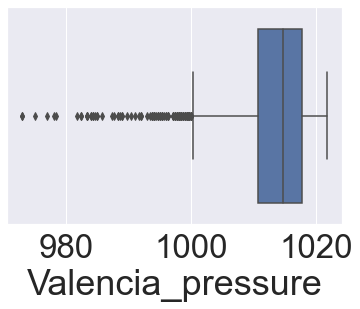

In [52]:
sns.boxplot(df_test['Valencia_pressure'])

In [53]:
print('Mean')
print(df_train['Valencia_pressure'].mean())
print('Mode')
print(df_train['Valencia_pressure'].mode())
print('Median')
print(df_train['Valencia_pressure'].median())

Mean
1012.0514065222828
Mode
0    1018.0
dtype: float64
Median
1015.0


In [54]:
print('Mean')
print(df_test['Valencia_pressure'].mean())
print('Mode')
print(df_test['Valencia_pressure'].mode())
print('Median')
print(df_test['Valencia_pressure'].median())

Mean
1013.1483509056495
Mode
0    1016.0
dtype: float64
Median
1014.6666666667


### Choosing the measure to replace null values

As observed all three measures of central tendency have very similar values, as such there wouldn't be too much of a difference which measure we choose to go with. However, for the purpose of this model, we shalll replace the null values in "Valencia pressure" with the mean, since it is a better measure for the datatype.

In [56]:
#Replacing the null values with the mean
df_clean_train = df_train
df_clean_train['Valencia_pressure'] = df_clean_train['Valencia_pressure'].fillna(df_clean_train['Valencia_pressure'].mean())

In [57]:
#Replacing the null values with the mean
df_clean_test = df_test
df_clean_test['Valencia_pressure'] = df_clean_test['Valencia_pressure'].fillna(df_clean_test['Valencia_pressure'].mean())

In [58]:
df_clean_train.isnull().sum(), df_clean_test.isnull().sum()

(time                    0
 Madrid_wind_speed       0
 Valencia_wind_deg       0
 Bilbao_rain_1h          0
 Valencia_wind_speed     0
 Seville_humidity        0
 Madrid_humidity         0
 Bilbao_clouds_all       0
 Bilbao_wind_speed       0
 Seville_clouds_all      0
 Bilbao_wind_deg         0
 Barcelona_wind_speed    0
 Barcelona_wind_deg      0
 Madrid_clouds_all       0
 Seville_wind_speed      0
 Barcelona_rain_1h       0
 Seville_pressure        0
 Seville_rain_1h         0
 Bilbao_snow_3h          0
 Barcelona_pressure      0
 Seville_rain_3h         0
 Madrid_rain_1h          0
 Barcelona_rain_3h       0
 Valencia_snow_3h        0
 Madrid_weather_id       0
 Barcelona_weather_id    0
 Bilbao_pressure         0
 Seville_weather_id      0
 Valencia_pressure       0
 Seville_temp_max        0
 Madrid_pressure         0
 Valencia_temp_max       0
 Valencia_temp           0
 Bilbao_weather_id       0
 Seville_temp            0
 Valencia_humidity       0
 Valencia_temp_min       0
 

### Checking the data type

We checked to identify the data types contained in the dataset. Machine learning models only work with numeric data, which means the data types for the models must be floats or integers in order to get the best predictions out of the models built from our data.

In [59]:
df_clean_train.dtypes, df_clean_test.dtypes

(time                     object
 Madrid_wind_speed       float64
 Valencia_wind_deg        object
 Bilbao_rain_1h          float64
 Valencia_wind_speed     float64
 Seville_humidity        float64
 Madrid_humidity         float64
 Bilbao_clouds_all       float64
 Bilbao_wind_speed       float64
 Seville_clouds_all      float64
 Bilbao_wind_deg         float64
 Barcelona_wind_speed    float64
 Barcelona_wind_deg      float64
 Madrid_clouds_all       float64
 Seville_wind_speed      float64
 Barcelona_rain_1h       float64
 Seville_pressure         object
 Seville_rain_1h         float64
 Bilbao_snow_3h          float64
 Barcelona_pressure      float64
 Seville_rain_3h         float64
 Madrid_rain_1h          float64
 Barcelona_rain_3h       float64
 Valencia_snow_3h        float64
 Madrid_weather_id       float64
 Barcelona_weather_id    float64
 Bilbao_pressure         float64
 Seville_weather_id      float64
 Valencia_pressure       float64
 Seville_temp_max        float64
 Madrid_pr

### Modifying the time feature
We mapped this feature into a date_time format which is the appropriate data type for date/time features, then we created new features off the time feature that is usable by the model.

In [60]:
df_clean_train['time'] = pd.to_datetime(df_clean_train['time'])
df_clean_train.time

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
8758   2017-12-31 09:00:00
8759   2017-12-31 12:00:00
8760   2017-12-31 15:00:00
8761   2017-12-31 18:00:00
8762   2017-12-31 21:00:00
Name: time, Length: 8763, dtype: datetime64[ns]

In [61]:
df_clean_test['time'] = pd.to_datetime(df_clean_test['time'])
df_clean_test.time

0      2018-01-01 00:00:00
1      2018-01-01 03:00:00
2      2018-01-01 06:00:00
3      2018-01-01 09:00:00
4      2018-01-01 12:00:00
               ...        
2915   2018-12-31 09:00:00
2916   2018-12-31 12:00:00
2917   2018-12-31 15:00:00
2918   2018-12-31 18:00:00
2919   2018-12-31 21:00:00
Name: time, Length: 2920, dtype: datetime64[ns]

In [62]:
column_list =[]

# day
df_clean_train['Day'] = df_clean_train['time'].dt.day

# month
df_clean_train['Month'] = df_clean_train['time'].dt.month

# year
df_clean_train['Year'] = df_clean_train['time'].dt.year

# hour
df_clean_train['hour'] = df_clean_train['time'].dt.hour

# minute
df_clean_train['minute'] = df_clean_train['time'].dt.minute

# second
df_clean_train['second'] = df_clean_train['time'].dt.second


# adding the new features to the dataset 
column_list = ['time','hour','Day','Month','Year','minute','second'] + list(df_clean_train.columns[1:-6])



df_clean_train = df_clean_train[column_list]




In [64]:
column_list =[]

# day
df_clean_test['Day'] = df_clean_test['time'].dt.day

# month
df_clean_test['Month'] = df_clean_test['time'].dt.month

# year
df_clean_test['Year'] = df_clean_test['time'].dt.year

# hour
df_clean_test['hour'] = df_clean_test['time'].dt.hour

# minute
df_clean_test['minute'] = df_clean_test['time'].dt.minute

# second
df_clean_test['second'] = df_clean_test['time'].dt.second


# adding the new features to the dataset 
column_list = ['time','hour','Day','Month','Year','minute','second'] + list(df_clean_test.columns[1:-6])



df_clean_test = df_clean_test[column_list]



In [63]:
df_clean_train.head()

,time,hour,Day,Month,Year,minute,second,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,3,1,1,2015,0,0,0.666667,level_5,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,6,1,1,2015,0,0,0.333333,level_10,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,9,1,1,2015,0,0,1.000000,level_9,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,12,1,1,2015,0,0,1.000000,level_8,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,15,1,1,2015,0,0,1.000000,level_7,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [65]:
df_clean_test.head()

,time,hour,Day,Month,Year,minute,second,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,2018-01-01 00:00:00,0,1,1,2018,0,0,5.000000,level_8,0.0,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,2018-01-01 03:00:00,3,1,1,2018,0,0,4.666667,level_8,0.0,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,2018-01-01 06:00:00,6,1,1,2018,0,0,2.333333,level_7,0.0,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,2018-01-01 09:00:00,9,1,1,2018,0,0,2.666667,level_7,0.0,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,2018-01-01 12:00:00,12,1,1,2018,0,0,4.000000,level_7,0.0,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


### Dropping irrelevant features

Here we dropped features that are not useful to our model. Features dropped include the "time" column and other columns with multicollinearity as identified during the EDA phase. Some of these Features were dropped based on their inherent characteristics. The second, minute, and rain_1h columns for instance comprises mostly zeros, and will as such contribute very little to the model. Seville_pressure was dropped as it doesn't conform with the rest of the pressure columns. While other pressure columns appear to be continuous data, the Seville_pressure column appears to be a categorical data. Likewise the Valencia_wind_deg feature.

In [66]:
df_modified_train = df_clean_train
df_modified_train = df_modified_train.drop([ 'time','Madrid_temp_min','Madrid_temp_max','Seville_temp_min', 'Bilbao_temp_max','Bilbao_temp_min','Valencia_temp_max','Valencia_temp_min','Barcelona_temp_max','Barcelona_temp_min','minute', 'second', 'Valencia_wind_deg', 'Seville_temp_max','Seville_temp', 'Madrid_temp',
                     'Bilbao_rain_1h', 'Barcelona_rain_1h', 'Seville_rain_1h', 'Madrid_rain_1h', 'Seville_pressure', 'Valencia_snow_3h', 'Barcelona_rain_3h', 'Seville_rain_3h', 'Seville_clouds_all', 'Madrid_clouds_all','Bilbao_snow_3h', 'Valencia_snow_3h'], axis = 1)

In [67]:
df_modified_test = df_clean_test
df_modified_test = df_modified_test.drop([ 'time','Madrid_temp_min','Madrid_temp_max','Seville_temp_min', 'Bilbao_temp_max','Bilbao_temp_min','Valencia_temp_max','Valencia_temp_min','Barcelona_temp_max','Barcelona_temp_min','minute', 'second', 'Valencia_wind_deg', 'Seville_temp_max','Seville_temp', 'Madrid_temp',
                     'Bilbao_rain_1h', 'Barcelona_rain_1h', 'Seville_rain_1h', 'Madrid_rain_1h', 'Seville_pressure', 'Valencia_snow_3h', 'Barcelona_rain_3h', 'Seville_rain_3h', 'Seville_clouds_all', 'Madrid_clouds_all','Bilbao_snow_3h', 'Valencia_snow_3h'], axis = 1)

In [69]:
df_modified_train.head()

,hour,Day,Month,Year,Madrid_wind_speed,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Madrid_pressure,Valencia_temp,Bilbao_weather_id,Valencia_humidity,Barcelona_temp,Bilbao_temp,load_shortfall_3h
0,3,1,1,2015,0.666667,0.666667,74.333333,64.000000,0.0,1.000000,...,1035.000000,800.0,1002.666667,971.333333,269.888000,800.0,75.666667,281.013000,269.338615,6715.666667
1,6,1,1,2015,0.333333,1.666667,78.333333,64.666667,0.0,1.000000,...,1035.666667,800.0,1004.333333,972.666667,271.728333,800.0,71.000000,280.561667,270.376000,4171.666667
2,9,1,1,2015,1.000000,1.000000,71.333333,64.333333,0.0,1.000000,...,1036.000000,800.0,1005.333333,974.000000,278.008667,800.0,65.666667,281.583667,275.027229,4274.666667
3,12,1,1,2015,1.000000,1.000000,65.333333,56.333333,0.0,1.000000,...,1036.000000,800.0,1009.000000,994.666667,284.899552,800.0,54.000000,283.434104,281.135063,5075.666667
4,15,1,1,2015,1.000000,1.000000,59.000000,57.000000,2.0,0.333333,...,1035.333333,800.0,1012.051407,1035.333333,283.015115,800.0,58.333333,284.213167,282.252063,6620.666667


In [70]:
df_modified_test.head()

,hour,Day,Month,Year,Madrid_wind_speed,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Madrid_pressure,Valencia_temp,Bilbao_weather_id,Valencia_humidity,Barcelona_temp,Bilbao_temp
0,0,1,1,2018,5.000000,5.000000,87.000000,71.333333,20.000000,3.000000,...,800.000000,1025.666667,800.000000,1013.148351,1030.000000,287.483333,801.000000,46.333333,287.356667,280.380000
1,3,1,1,2018,4.666667,5.333333,89.000000,78.000000,0.000000,3.666667,...,800.333333,1026.666667,800.000000,1013.148351,1030.333333,284.150000,721.000000,53.666667,284.190000,281.010000
2,6,1,1,2018,2.333333,5.000000,89.000000,89.666667,0.000000,2.333333,...,800.000000,1025.333333,800.333333,1013.148351,1030.666667,282.816667,800.000000,42.000000,283.150000,279.196667
3,9,1,1,2018,2.666667,5.333333,93.333333,82.666667,26.666667,5.666667,...,800.000000,1025.000000,800.333333,1013.148351,1032.333333,283.483333,801.333333,45.000000,283.190000,281.740000
4,12,1,1,2018,4.000000,8.666667,65.333333,64.000000,26.666667,10.666667,...,800.333333,1022.333333,800.000000,1013.148351,1032.333333,287.150000,801.333333,41.000000,286.816667,284.116667


In [71]:
df_modified_train.columns, df_modified_test.columns

(Index(['hour', 'Day', 'Month', 'Year', 'Madrid_wind_speed',
        'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
        'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Bilbao_wind_deg',
        'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Seville_wind_speed',
        'Barcelona_pressure', 'Madrid_weather_id', 'Barcelona_weather_id',
        'Bilbao_pressure', 'Seville_weather_id', 'Valencia_pressure',
        'Madrid_pressure', 'Valencia_temp', 'Bilbao_weather_id',
        'Valencia_humidity', 'Barcelona_temp', 'Bilbao_temp',
        'load_shortfall_3h'],
       dtype='object'),
 Index(['hour', 'Day', 'Month', 'Year', 'Madrid_wind_speed',
        'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
        'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Bilbao_wind_deg',
        'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Seville_wind_speed',
        'Barcelona_pressure', 'Madrid_weather_id', 'Barcelona_weather_id',
        'Bilbao_pressure', 'Seville_weather_id'

In [72]:
df_modified_train.dtypes, df_modified_test.dtypes

(hour                      int64
 Day                       int64
 Month                     int64
 Year                      int64
 Madrid_wind_speed       float64
 Valencia_wind_speed     float64
 Seville_humidity        float64
 Madrid_humidity         float64
 Bilbao_clouds_all       float64
 Bilbao_wind_speed       float64
 Bilbao_wind_deg         float64
 Barcelona_wind_speed    float64
 Barcelona_wind_deg      float64
 Seville_wind_speed      float64
 Barcelona_pressure      float64
 Madrid_weather_id       float64
 Barcelona_weather_id    float64
 Bilbao_pressure         float64
 Seville_weather_id      float64
 Valencia_pressure       float64
 Madrid_pressure         float64
 Valencia_temp           float64
 Bilbao_weather_id       float64
 Valencia_humidity       float64
 Barcelona_temp          float64
 Bilbao_temp             float64
 load_shortfall_3h       float64
 dtype: object,
 hour                      int64
 Day                       int64
 Month                     

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we created two models that enable us to accurately predict the thee hour load shortfall. |

---



In [79]:
# split data
y = df_modified_train[['load_shortfall_3h']]
x = df_modified_train.drop('load_shortfall_3h',axis=1)

In [80]:
x.head()

,hour,Day,Month,Year,Madrid_wind_speed,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Madrid_pressure,Valencia_temp,Bilbao_weather_id,Valencia_humidity,Barcelona_temp,Bilbao_temp
0,3,1,1,2015,0.666667,0.666667,74.333333,64.000000,0.0,1.000000,...,800.0,1035.000000,800.0,1002.666667,971.333333,269.888000,800.0,75.666667,281.013000,269.338615
1,6,1,1,2015,0.333333,1.666667,78.333333,64.666667,0.0,1.000000,...,800.0,1035.666667,800.0,1004.333333,972.666667,271.728333,800.0,71.000000,280.561667,270.376000
2,9,1,1,2015,1.000000,1.000000,71.333333,64.333333,0.0,1.000000,...,800.0,1036.000000,800.0,1005.333333,974.000000,278.008667,800.0,65.666667,281.583667,275.027229
3,12,1,1,2015,1.000000,1.000000,65.333333,56.333333,0.0,1.000000,...,800.0,1036.000000,800.0,1009.000000,994.666667,284.899552,800.0,54.000000,283.434104,281.135063
4,15,1,1,2015,1.000000,1.000000,59.000000,57.000000,2.0,0.333333,...,800.0,1035.333333,800.0,1012.051407,1035.333333,283.015115,800.0,58.333333,284.213167,282.252063


In [81]:
y.head()

,load_shortfall_3h
0,6715.666667
1,4171.666667
2,4274.666667
3,5075.666667
4,6620.666667


### Building One or More ML Models

First we created a base model, and two other models. In this case, our base model is a simple linear regression model. Other models created to improve predictive performance are the random forest and lasso regression models.

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.34,random_state=50)

#### i. Linear Regression Model

In [84]:
# Declare the model object
lm = LinearRegression()

# fit linear model
lm.fit(x_train, y_train)

prediction_lm = lm.predict(x_test)


#### ii. Random Forest Regression Model
Random forests or random decision forests is an ensemble learning method. In the following cells, the random forest regression model will be loaded, trained and used to predict the load shortfall from the given data set.

In [85]:
# Fitting Random Forest Regression to the dataset

# create regressor object
Rfr = RandomForestRegressor(n_estimators = 100, max_depth=15, random_state=18)

Rfr.fit(x_train, np.ravel(y_train))

predictions_Rfr_test = Rfr.predict(x_test)

#### iii. LASSO Regression Model

In [86]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(x_train, y_train)

predictions_lasso_test = lasso.predict(x_test)


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section we compared the relative performance of the various trained ML models on a holdout dataset and indicated which is the best and why. |

---

### The root mean square value (RMSE)

The root mean squared error (RMSE) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the actual values observed. It is a very useful tool in telling how well the model predicted the values using the test dataset. Below is a function that calculates and returns the
average RMSE of the model.

In [87]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [88]:
# Compare model performance
# LINEAR REGRESSION MODEL

## TRAIN
prediction_lm_train = lm.predict(x_train)
MSE_lm_train = mean_squared_error(y_train, prediction_lm_train)
R_2_lm_train = r2_score(y_train, prediction_lm_train)
RMSE_lm_train = np.sqrt(MSE_lm_train)


## TEST
prediction_lm_test = lm.predict(x_test)
MSE_lm_test = mean_squared_error(y_test, prediction_lm_test)
R_2_lm_test = r2_score(y_test, prediction_lm_test)
RMSE_lm_test = np.sqrt(MSE_lm_test)



# REGRESSION MODEL USING RANDOM FOREST
## TRAIN
prediction_Rfr_train = Rfr.predict(x_train)
MSE_Rfr_train = mean_squared_error(y_train, prediction_Rfr_train)
R_2_Rfr_train = r2_score(y_train, prediction_Rfr_train)
RMSE_Rfr_train = np.sqrt(MSE_Rfr_train)


## TEST
predictions_Rfr_test = Rfr.predict(x_test)
MSE_Rfr_test = mean_squared_error(y_test, predictions_Rfr_test)
R_2_Rfr_test = r2_score(y_test, predictions_Rfr_test)
RMSE_Rfr_test = np.sqrt(MSE_Rfr_test)


# LASSO REGRESSION MODEL
## TRAIN
prediction_lasso_train = lasso.predict(x_train)
MSE_lasso_train = mean_squared_error(y_train, prediction_lasso_train)
R_2_lasso_train = r2_score(y_train, prediction_lasso_train)
RMSE_lasso_train = np.sqrt(MSE_lasso_train)


## TEST
predictions_lasso_test = lasso.predict(x_test)
MSE_lasso_test = mean_squared_error(y_test, predictions_lasso_test)
R_2_lasso_test = r2_score(y_test, predictions_lasso_test)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

In [89]:
# dictionary of results

results_dict = {'Training R-Square Score':
                        {
                            "Linear Regression Model": R_2_lm_train,
                           # "Linear Regression Model p_val": R_2_lm_corr_pval_train,
                            "LASSO": R_2_lasso_train,
                            "Random Forest": R_2_Rfr_train
                        },
                
                    'Test R-Square Score':
                        {
                            "Linear Regression Model": R_2_lm_test,
                            #"Linear Regression Model p_val": R_2_lm_corr_pval_test,
                           "LASSO": R_2_lasso_test,
                            "Random Forest": R_2_Rfr_test
                        },
                
                    'Training RMSE':
                        {
                            "Linear Regression Model": RMSE_lm_train,
                         #   "Linear Regression Model p_val": RMSE_lm_corr_pval_train,
                            "LASSO": RMSE_lasso_train,
                            "Random Forest": RMSE_Rfr_train
                        },
                
                    'Test RMSE':
                        {
                            "Linear Regression Model": RMSE_lm_test,
                          #  "Linear Regression Model p_val": RMSE_lm_corr_pval_test,
                           "LASSO": RMSE_lasso_test,
                            "Random Forest": RMSE_Rfr_test
                        }
                }

# create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

pd.options.display.float_format = "{:,.5f}".format
results_df = results_df.astype(float)

### Model Performance Results





In [90]:
results_df

,Training R-Square Score,Test R-Square Score,Training RMSE,Test RMSE
Linear Regression Model,0.14509,0.14250,"4,799.31344","4,880.00828"
LASSO,0.14509,0.14249,"4,799.31381","4,880.04579"
Random Forest,0.91702,0.62563,"1,495.22003","3,224.44271"


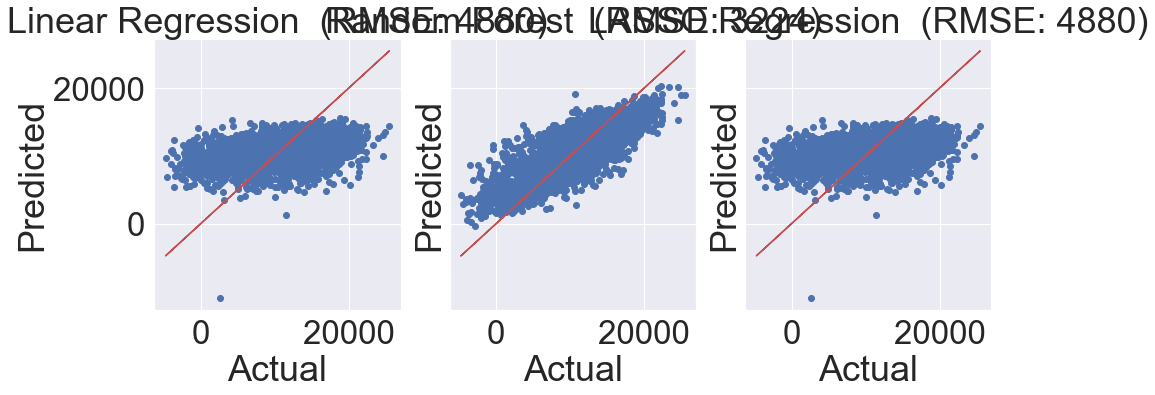

In [91]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
pred = [lm.predict(x_test), Rfr.predict(x_test), lasso.predict(x_test)]
title = ['Linear Regression','Random Forest', 'LASSO Regression']

# Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i]) 

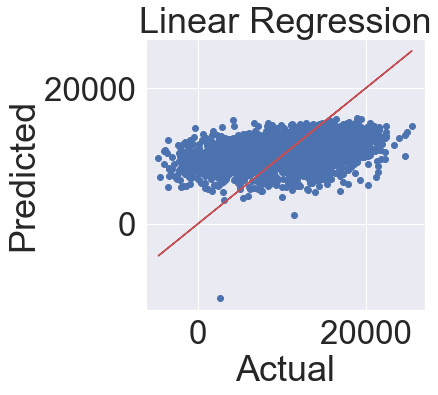

In [92]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Linear Regression')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,prediction_lm)
ax.plot(y_test,y_test,'r')
plt.show()

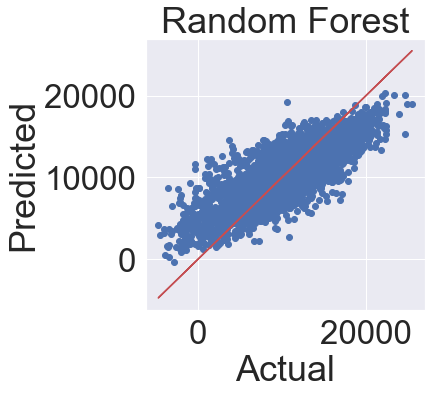

In [93]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Random Forest')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,predictions_Rfr_test)
ax.plot(y_test,y_test,'r')
plt.show()

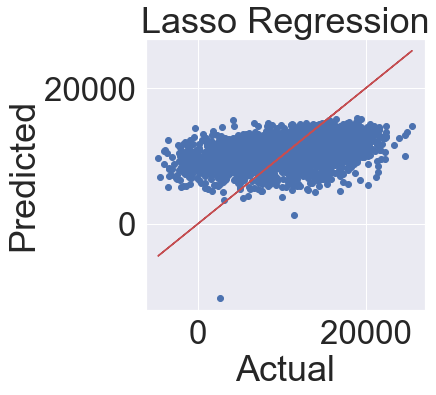

In [94]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Lasso Regression')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,predictions_lasso_test)
ax.plot(y_test,y_test,'r')
plt.show()

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we discuss the how the model with the best performance based on the analysis in the previous section works. |

---


From our test results as displayed in the previous section, it can be observed that the Random Forest model gives a better RMSE and R_2 score, thus making it the best model among the three prediction models built.

### Understanding Random Forest Models

A **Random Forest** is a powerful non-parametric algorithm (ie an algorithm that does not make strong assumptions about the form of the mapping function, but instead is free to learn any functional form from the training dataset). It is important to note that non-parametric models like this are good when you have a lot of data with no prior knowledge, and you don’t want to worry too much about choosing just the right features.

Random Forest is an example of an ensemble method built on decision trees. Ensemble methods is a machine learning technique that combines several base models in order to produce one optimal predictive model. In other words, a random forest model relies on aggregating the results of an ensemble of decision trees.

## 8. Making a Kaggle submission

We converted the model with a better performance to a CSV file and exported for submission on Kaggle. The Random Forest model appears to be the best model, considering it gives a lower rmse value and a better r_2 score, hence our selection for submission. 

In [96]:
predicted_y = pd.DataFrame(predictions_Rfr_test, columns = ['load_shortfall_3h'])
predicted_y.head()

,load_shortfall_3h
0,"15,333.21266"
1,"13,168.49580"
2,"9,920.52262"
3,"16,989.16924"
4,"14,794.88634"


In [98]:
predicted_y.describe().round()

,load_shortfall_3h
count,"2,980.00000"
mean,"10,547.00000"
std,"3,583.00000"
min,-329.00000
25%,"8,016.00000"
50%,"10,902.00000"
75%,"13,299.00000"
max,"20,253.00000"


In [97]:
y.describe().round()

,load_shortfall_3h
count,"8,763.00000"
mean,"10,674.00000"
std,"5,218.00000"
min,"-6,618.00000"
25%,"7,390.00000"
50%,"11,115.00000"
75%,"14,498.00000"
max,"31,904.00000"


In [ ]:
output = pd.DataFrame({'time':df_test['time']})
team_submission_Lr = output.join(submitted_y)
team_submission_Lr.to_csv('team_NM2_submission.csv', index = False)

## 9. References

https://machinelearningmastery.com/parametric-and-nonparametric-machine-learning-algorithms/#:~:text=Algorithms%20that%20do%20not%20make,form%20from%20the%20training%20data.